# Introduction

According to UNESCO, **'Freshwater is the most important resource for the survival of human kind'**. Freshwater is an enabling source of conflict for any technological, social, cooperation or conflict in the world. Comparing past water resources with those of the present can help us understand how past societal and economic decisions can contribute to more informed management decision in the future. We have publicly available dataset from organizations like NASA and European Space Agency - Sentinel 2. You have been hired by UNESCO, to use satellite imagery and deep learning image segmentation algorithms to asses the changes of freshwater over time.

## Getting Started

We demonstrate how to load images. we will start by using one image from the ibuilt CIFAR1O dataset. we take the first image and delete the rest.

In [ ]:
import tensorflow as tf

In [ ]:
(x_train,_),(_,_) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
img = x_train[0]
img1 = x_train[1]
img2 = x_train[2]
img3 = x_train[3]
img4 = x_train[4]
img5 = x_train[5]
img6 = x_train[6]
img7 = x_train[7]
img8 = x_train[8]

In [ ]:
del x_train

In [ ]:
#We need to check the nature of the selected image.

img.shape

(32, 32, 3)

In [ ]:
img_array = tf.image.resize(img, (64,64), preserve_aspect_ratio=True, antialias=False)


In [ ]:
img_r = tf.image.rot90(img_array)
img_r1 = tf.image.rot90(img1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

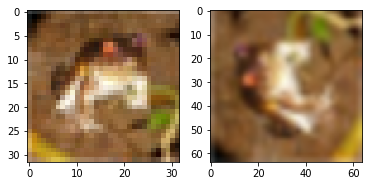

In [ ]:
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(img_r.numpy().astype('uint8'), cmap='gray')

###Mounting data from from google drive

*Sometimes you have a dataset that is in the drive. When working with colab, it is possible to mount data from Google Drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!ls './drive/My Drive/data'

cars


We need a number of libraries for image manipulations

In [ ]:
from collections import Counter
#Image processing library methods
from cv2 import imread, resize, cvtColor, COLOR_BGR2BGRA
from glob import glob
from random import randint

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Folder definitions
root_folder = '/content/drive/My Drive/data'
class_names = ['swift', 'wagonr']
dataset_name = 'cars'
train_folder = 'train'
val_folder = 'validation'
test_folder = 'test'

In [ ]:
# function for counting the number of images in each 
def get_files_list(folder_name):
  '''Method to read the list of files from a folder'''
  files_list=[]
  for class_name in class_names:
    for file_name in glob(f"{root_folder}/{dataset_name}/{folder_name}/{class_name}/*.jpg"):
    
      files_list.append(file_name)
  return files_list

In [ ]:
train_list = get_files_list(train_folder)
print(f"Number of files in train folder: {len(train_list)}")

Number of files in train folder: 2400


In [ ]:
test_list = get_files_list(test_folder)
print(f"Number of files in test folder: {len(test_list)}")

Number of files in test folder: 723


In [ ]:
val_list = get_files_list(val_folder)
print(f"Number of files in validation folder: {len(val_list)}")

Number of files in validation folder: 800


In [ ]:
#Define some image dimensions constants
new_w, new_h = 100,100
n_channels = 3

In [ ]:
def read_and_process_image(file_path, show_details = False):
  '''Read the image from the file and folder name, resize and preprocess it'''
  #Read image using openCV
  img = imread(file_path)
  if show_details: print(f"Shape: {img.shape}") #print only when needed
  #resize the image to a constant width and height
  img = resize(img, (new_w,new_h))
  img = cvtColor(img, COLOR_BGR2BGRA)
  #Normalize the images
  img = img/255
  if show_details: print(f"Reshape: {img.shape}")
  return img

Shape: (363, 272, 3)
Reshape: (100, 100, 4)


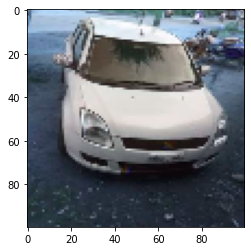

In [ ]:
img = read_and_process_image(train_list[10], show_details = True)
plt.imshow(img)

In [ ]:
#Visualizing the images
def show_images(images_list):
  '''method for debugging and visualization of images'''
  n:int = len(images_list)
  f=plt.figure(figsize=(15,15))
  columns=4
  rows=4
  for i in range(columns*rows):
    image_path=images_list[randint(0, n-1)]
    fol_name = image_path.split("/")[-2]
    #Debug, plot the figure
    ax=f.add_subplot(rows,columns,i+1)
    ax.set_title(fol_name)
    img = read_and_process_image(image_path)
    plt.axis('off')
    plt.imshow(img)
    plt.show(block=True)

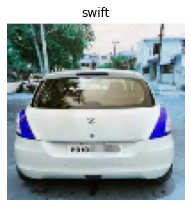

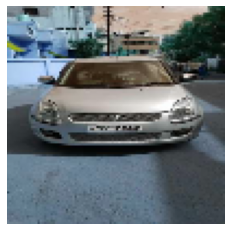

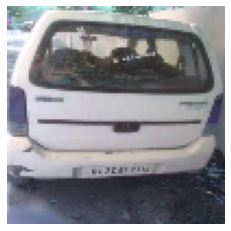

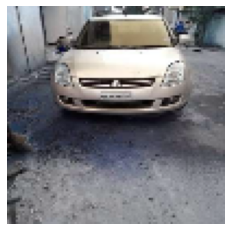

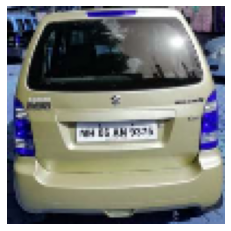

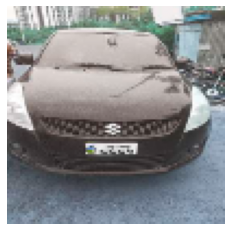

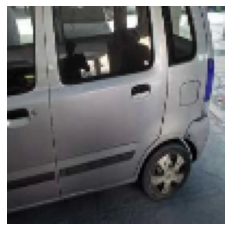

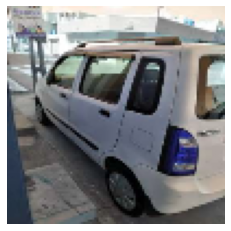

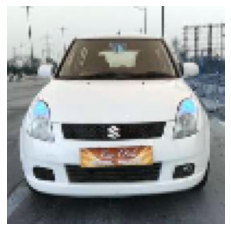

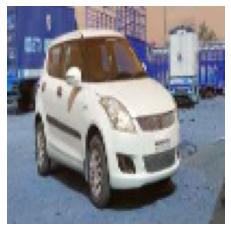

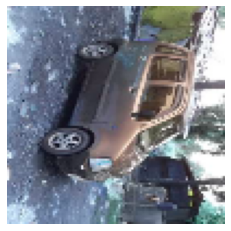

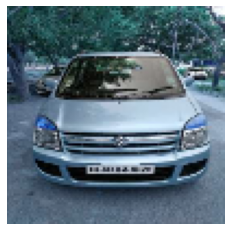

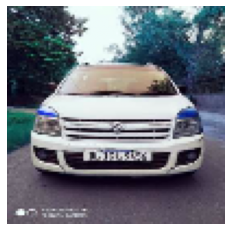

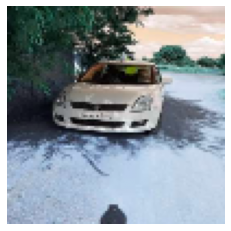

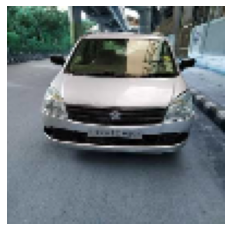

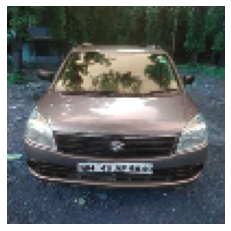

In [ ]:
show_images(train_list)

# Data Aquisition and Pre-Processing

The main objectives of this section:



*   Introduce the tools required to access and format large datasets programmatically (i.e. with code) and  those specific to analyzing satellite or other geospatial imagery.
*   Introduction to geospatial imagery formats and concepts (imagery in a particular coordinate system)
*   Introduction to image labeling workflows
  





This is the most difficult part of our project (Since it will introduce domain specific concepts). Soecifically the domain is **geospatial analysis**, bu also cartography, geodesy, and satellite remote sensing. A few terms:


*   Remote Sersing - the fancy term for satellite images
*   Orthorectification - Process of lining up images to base map (the "rectification" part, and correcting distortion associated with varrying elevation -- height - this is the ortho part)
*   UTM - Universal Time Mercator - Corrdinate system like latitude/ lonfitude.  Requires a "zone", that differs where you are in longitude (the UTM number) and whether or not you are in the northern or southerm hemisphere.
*   Raster/Vector - Raster - pixel images, Vector - series of points.
*   DEM - Digital Elevation Map - the height of any place on Earth.





All of the images we will work with are of lakes somewhere on Earth. some of the imagery we will be working with an explicitly reference location of the image on Earth(the coordinates). The coordinates system   whose locations refer to(called a coordinate reference system, or CRS). Such informatin is called metadata and is stored in the image headers. This milestone will explore various image formats (most common), namely geo TIFF (.tif or .tiff) file extensions and also JPEG- 2000 (.jp2 extension). Rasters or "grided data" are stored as a grid of values which are rendered on a map as pixels. E.g. Google Earth Imagery. Can be 2D images horizontal (in both directions). Can also be 3D if you have a stack 3 2D rasters on top of one another. For example every color photography you have seen is a 3D raster , composed of 3 2D rasters: The first is the intensity in the red(R) channel, the 2nd is Green, and the third is Blue. - RGB -3D Rasters = multispectral images. Spectral because of EM spectrum representation of the RGB.

---
Note: Satellites also collect data in portions we cannot see (infrared and ultra-violet portions). Depending on the number of bands, such data is called either multispectral or hyperspectral. If you stack more than 3 bands in raster then it is called a hyperspectral imagery and not 4D or 5D. Such images may have up to hundreds of individual bands or sensitivitiesto different portions of the EMS. Each pixel value of the raster represents an area on the earth's surface and is therefore, sensitive to the ground moisture and temperature as well as weatherr and other atmospheric variations. It is difficult to use satellite iagery only and this is why we need deep learning for this kind of problem. A raster file is composed of regular grid of cells, all of which are the same size. However the raster we are going to work with are different from the photographs because they are spatially referenced. If you pick a pixel it represents an area of land on the ground. And the area of a pixel on the ground is defined by spatial resolution of the raster. We are working with Sentinel 2 with 10-m spatial resolution (10m*10m) area on the ground.

1. Dataset 1: A time series of the cloudless sentinel 2 imagery. [Sentinel 2 cloudless](https://s2maps.eu/)

*  Use it to know, sentinel 2 satellite imagery and illustrate how Earth's lakes are changing
*  Develop "test" dataset required to evaluate the models. Using python and Sentinel 2 cloudless API and working with raster imagery.
*  View imagery == (optional) - QGIS

2. Dataset 2: NWPU - RESISC45 dataset of land covers and uses [RESISCA45](https://www.drweiscience.com/people/JunweiHan/NWPU-RESISC45.html)

*  We will write a python program to dowload, unzip and split and prepare the data
*  Load and display an example image and label in the Jupyter notebook.

3. Creating our own label data.
*  Creating label with the makesense site
*  The VGG JSON format for polygon anotations

4. Convert the VGG JSON label format into a label image using Python.

5. Develop our own dataset using the Sentinelast package
*  Sentinel API -- Introduction to GeoJSON and API query using GeoJSON. Filtering imagery by mission orbit, date, type, cloud cover etc.
*  Unzipping compressed files
*  Merge Imagery with Rasterio

In [ ]:
# Load the necessary libraries

In [ ]:
pip install rasterio

     |████████████████████████████████| 18.2MB 243kB/s 


In [ ]:
from PIL import Image, ImageDraw
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json, os, glob
import rasterio

- Enhancing and Segmenting Images

- Model Training and Evaluation

- Model Optimization

- Reporting to UNESCO